# Import packages and process data

In [3]:
# Data from https://www.kaggle.com/uciml/iris
# SVM notes from https://med.nyu.edu/chibi/sites/default/files/chibi/Final.pdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset of plant measurements and species classification
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data visualization

SVM attempts to find the optimal classification border based on two or more independent variables. By starting in two dimentions we can easily visualize the data. Let's try to find the classication border for a few highly correlated points:

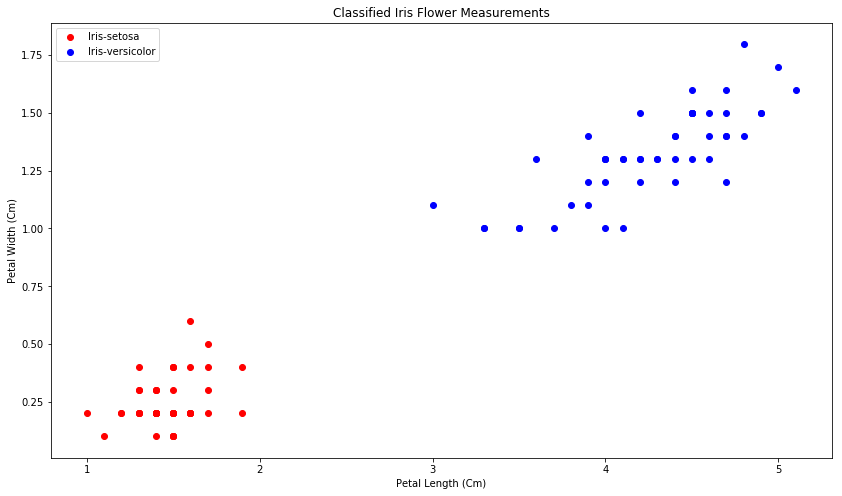

In [4]:
setosa = df[(df.Species == 'Iris-setosa')]
versicolor = df[(df.Species == 'Iris-versicolor')]
colors = list()
plt.figure(figsize=(14,8))
p1 = plt.scatter(setosa.PetalLengthCm, setosa.PetalWidthCm, c='r')
p2 = plt.scatter(versicolor.PetalLengthCm, versicolor.PetalWidthCm, c='b')
plt.title('Classified Iris Flower Measurements')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend((p1, p2), ('Iris-setosa', 'Iris-versicolor'), loc='upper left')
plt.show()

# SVM implementation (Linear, non-kerneled, and hard margin)

Our goal is draw a dividing line (hyperplane) between data points that seperates the data into two classes. It should maximize the the space (margin) between the line and the nearest points (support vectors). In sigma notation, we want to minimize $W(\alpha)$:
$$W(\alpha) = \sum_{i=1}^{l} \alpha_{i} + \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} y_{i} y_{j} \alpha_{i} \alpha_{j}(x_{i} \cdot x_{j})$$
where $\alpha$ is the vector of $l$ non-negative Lagrange multipliers to be determined, and $C$ is a constant. Note that only the closest points to the hyperplane are important for the problem. We could remove all other points and arrive at the same solution. Those points and their derived vectors are the 'support vectors' in Support Vector Machines. By adding dimentions, we can apply SVM to many independent variables and datasets that are not so obtusely seperated.

### Vectorizing (and merging) our data

Now our data is in a continuous list.

In [5]:
X = list()
Y = list()
for petal_l in setosa.PetalLengthCm:
    X.append(petal_l)
for petal_w in setosa.PetalWidthCm:
    Y.append(petal_w)
for petal_l in versicolor.PetalLengthCm:
    X.append(petal_l)
for petal_w in versicolor.PetalWidthCm:
    Y.append(petal_w)

### Implement SVM class

Lagrange multiplication technique is classically applied to optimization problems bounded by a constraint. Here, our constraint that must be satisfied is:
$$\sum_{i=1}^{l} y_{i} \alpha_{i} = 0$$
$$0 \leq \alpha_{i} \leq C (\forall i)$$

The multiplier itself is $\lambda$, or the proportionality between two gradients $\triangledown s = \lambda \triangledown t$.

In [7]:
def svm_sgd(X, Y):
    w = np.zeros(len(X))
    eta = 1
    epochs = 1000
    # Gradient descent (?)
    for epoch in range(1,epochs):
        
        for i, x in enumerate(X):
            if (Y[i] * np.dot(X[i], w)).any() < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + eta * (-2  *(1/epoch)* w)
    return w

In [10]:
w = svm_sgd(X,Y)
print (w)